In [397]:
from qutip import Bloch, basis, sigmax, sigmaz, sigmay, mesolve
import matplotlib.pyplot as plt
import numpy as np

In [405]:
# Variables

spin_up = basis(2, 0)
spin_down = basis(2, 1)

omega_0 = 500
omega_1 = 0.4
phi = 0

tf = 100

t = np.linspace(0, tf, 500)

psi_0 = spin_down # Initial condition

sx = sigmax()
sy = sigmay()
sz = sigmaz()

In [406]:
# Defining the Hamiltonians

H0 = - (omega_0 / 2) * sz # Time independent term
H1 = - (omega_1 / 2) * sx # Time dependent term

In [407]:
# Obtaining the coefficients for the time dependent term

def H1_coeff(t, args):
    return np.cos(omega_0 * t + phi)

In [408]:
# Defining the Hamiltonian of the system

H = [H0, [H1, H1_coeff]]

In [409]:
# Solving the Schrödinger Equation

output = mesolve(H, psi_0, t)

In [410]:
# Obtaining the probabilities

prob_up = []
prob_down = []
for state in output.states:
    amp_up = (spin_up.dag() * state)[0][0][0]
    prob_up.append(np.abs(amp_up)**2)

    amp_down = (spin_down.dag() * state)[0][0][0]
    prob_down.append(np.abs(amp_down)**2)

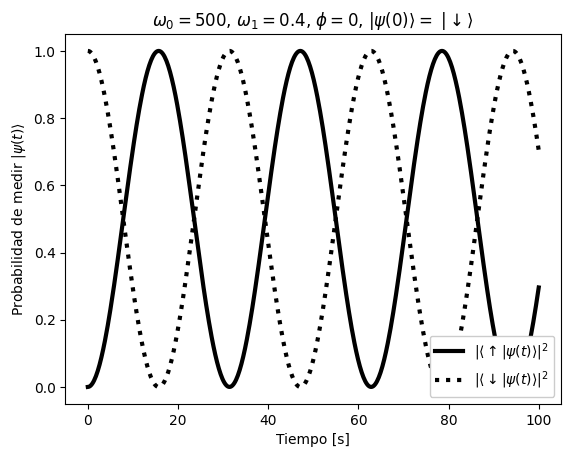

In [413]:
# Plotting the probabilities

fig, axes = plt.subplots()

width = 3
color = 'black'

axes.plot(t, prob_up, color=color, linewidth=width, linestyle='-', label=r'$|\langle \uparrow | \psi (t) \rangle|^2$')
axes.plot(t, prob_down, color=color, linewidth=width, linestyle=':', label=r'$|\langle \downarrow | \psi (t) \rangle|^2$')

if psi_0 == spin_up:
    init_cond = r'$\uparrow$'
else:
    init_cond = r'$\downarrow$'

axes.set_title(f'$\omega_0 = {omega_0}$, $\omega_1 = {omega_1}$, $\phi = {phi}$' + r', $ | \psi (0) \rangle = $ |' + init_cond + r'$\rangle$')
axes.set_xlabel('Tiempo [s]')
axes.set_ylabel(r'Probabilidad de medir $| \psi (t) \rangle$')
axes.legend(loc='lower right', framealpha=1)

plt.show()

In [282]:
b = Bloch()
b.vector_color = ['r']
b.view = [-40, 30]
for i in range(len(t)):
    b.clear()
    b.add_states(output.states[i])
    b.save(dirc='one_qubit')